# **CREDIT CARD APPROVAL**



Import needed packages

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import pickle

In [ ]:
warnings.filterwarnings("ignore")

Load dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/cc_approvals.data',names=['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','ApprovalStatus'])
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


checking missing values and datatypes

In [ ]:
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [ ]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [ ]:
df['Age'].value_counts()

?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: Age, Length: 350, dtype: int64

In [ ]:
df['Married'].value_counts()

u    519
y    163
?      6
l      2
Name: Married, dtype: int64

In [ ]:
df = df.applymap(lambda x: np.nan if x == '?' else x)

In [ ]:
df.isna().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [ ]:
df['ZipCode'].value_counts()

00000    132
00120     35
00200     35
00160     34
00100     30
        ... 
00021      1
00393      1
00395      1
00093      1
00256      1
Name: ZipCode, Length: 170, dtype: int64

converting datatypes and filling missing values

In [ ]:
df['Age'] = df['Age'].astype(float)
df['ZipCode'] = df['ZipCode'].astype(float)

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['ZipCode'] = df['ZipCode'].fillna(df['ZipCode'].mode()[0])

In [ ]:
df['ApprovalStatus'].unique()

array(['+', '-'], dtype=object)

<Axes: xlabel='ApprovalStatus', ylabel='count'>

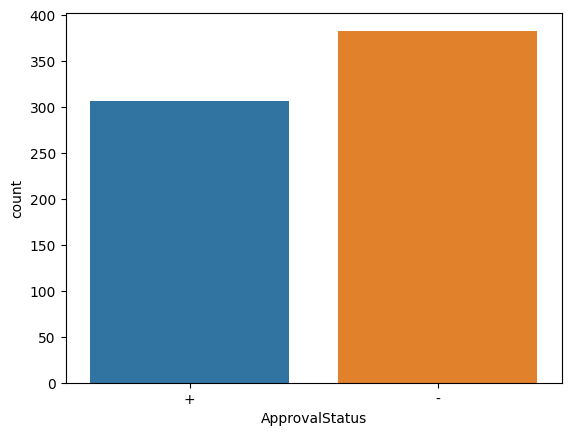

In [ ]:
sns.countplot(x='ApprovalStatus',data=df)

In [ ]:
df['ApprovalStatus'].value_counts()

-    383
+    307
Name: ApprovalStatus, dtype: int64

In [ ]:
df['ApprovalStatus']=df['ApprovalStatus'].map({'+': 1, '-': 0})
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [ ]:
df.isna().sum()

Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
ApprovalStatus     0
dtype: int64

In [ ]:
df['Gender'].value_counts()

b    468
a    210
Name: Gender, dtype: int64

In [ ]:
df['BankCustomer'].value_counts()

g     519
p     163
gg      2
Name: BankCustomer, dtype: int64

In [ ]:
df['Ethnicity'].value_counts()

v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

In [ ]:
df['EducationLevel'].value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

In [ ]:
df['PriorDefault'].value_counts()

t    361
f    329
Name: PriorDefault, dtype: int64

In [ ]:
df['Employed'].value_counts()

f    395
t    295
Name: Employed, dtype: int64

In [ ]:
df['DriversLicense'].value_counts()

f    374
t    316
Name: DriversLicense, dtype: int64

In [ ]:
df['Citizen'].value_counts()

g    625
s     57
p      8
Name: Citizen, dtype: int64

In [ ]:
lst=['DriversLicense','Employed','PriorDefault']
for i in lst:
    df[i]=df[i].map({'t': 1, 'f': 0})

In [ ]:
lst=['Gender','Married','BankCustomer','EducationLevel','Ethnicity']
for i in lst:
  df[i] = df[i].fillna(df[i].mode()[0])

In [ ]:
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [ ]:
gender_le=LabelEncoder()
married_le=LabelEncoder()
bankcustomer_le=LabelEncoder()
educationlevel_le=LabelEncoder()
ethnicity_le=LabelEncoder()
citizen_le=LabelEncoder()


In [ ]:
df['Gender']=gender_le.fit_transform(df['Gender'])
df['Married']=married_le.fit_transform(df['Married'])
df['BankCustomer']=bankcustomer_le.fit_transform(df['BankCustomer'])
df['EducationLevel']=educationlevel_le.fit_transform(df['EducationLevel'])
df['Ethnicity']=ethnicity_le.fit_transform(df['Ethnicity'])
df['Citizen']=citizen_le.fit_transform(df['Citizen'])


In [ ]:
gender_le_name_mapping=dict(zip(gender_le.classes_,gender_le.transform(gender_le.classes_)))
print("Gender:",gender_le_name_mapping)
married_le_name_mapping=dict(zip(married_le.classes_,married_le.transform(married_le.classes_)))
print("Married:",married_le_name_mapping)
bankcustomer_le_name_mapping=dict(zip(bankcustomer_le.classes_,bankcustomer_le.transform(bankcustomer_le.classes_)))
print("BankCustomer:",bankcustomer_le_name_mapping)
educationlevel_le_name_mapping=dict(zip(educationlevel_le.classes_,educationlevel_le.transform(educationlevel_le.classes_)))
print("EducationLevel:",educationlevel_le_name_mapping)
ethnicity_le_name_mapping=dict(zip(ethnicity_le.classes_,ethnicity_le.transform(ethnicity_le.classes_)))
print("Ethnicity:",ethnicity_le_name_mapping)
citizen_le_name_mapping=dict(zip(citizen_le.classes_,citizen_le.transform(citizen_le.classes_)))
print("Citizen:",citizen_le_name_mapping)

Gender: {'a': 0, 'b': 1}
Married: {'l': 0, 'u': 1, 'y': 2}
BankCustomer: {'g': 0, 'gg': 1, 'p': 2}
EducationLevel: {'aa': 0, 'c': 1, 'cc': 2, 'd': 3, 'e': 4, 'ff': 5, 'i': 6, 'j': 7, 'k': 8, 'm': 9, 'q': 10, 'r': 11, 'w': 12, 'x': 13}
Ethnicity: {'bb': 0, 'dd': 1, 'ff': 2, 'h': 3, 'j': 4, 'n': 5, 'o': 6, 'v': 7, 'z': 8}
Citizen: {'g': 0, 'p': 1, 's': 2}


In [ ]:
df.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
EducationLevel      int64
Ethnicity           int64
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen             int64
ZipCode           float64
Income              int64
ApprovalStatus      int64
dtype: object

split X and Y

In [ ]:
X=df.iloc[:,:-1]
X

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750


In [ ]:
Y=df.iloc[:,-1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: ApprovalStatus, Length: 690, dtype: int64

Normalizing X using minmaxscaler

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.00000000e+00, 2.56842105e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.01000000e-01, 0.00000000e+00],
       [0.00000000e+00, 6.75488722e-01, 1.59285714e-01, ...,
        0.00000000e+00, 2.15000000e-02, 5.60000000e-03],
       [0.00000000e+00, 1.61654135e-01, 1.78571429e-02, ...,
        0.00000000e+00, 1.40000000e-01, 8.24000000e-03],
       ...,
       [0.00000000e+00, 1.72932331e-01, 4.82142857e-01, ...,
        0.00000000e+00, 1.00000000e-01, 1.00000000e-05],
       [1.00000000e+00, 6.27067669e-02, 7.32142857e-03, ...,
        0.00000000e+00, 1.40000000e-01, 7.50000000e-03],
       [1.00000000e+00, 3.19548872e-01, 1.20535714e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

train test split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape

(483, 15)

In [ ]:
Y_train.shape

(483,)

model creation

In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
ad=AdaBoostClassifier(random_state=1)

In [ ]:
models=[knn,sv,nb,dt,rf,ad]
acc=[]
for model in models:
  print("********************************",model,"**************************************")
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  acc.append(accuracy_score(Y_test,Y_pred)*100)
  print(classification_report(Y_test,Y_pred))

******************************** KNeighborsClassifier() **************************************
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       122
           1       0.89      0.87      0.88        85

    accuracy                           0.90       207
   macro avg       0.90      0.90      0.90       207
weighted avg       0.90      0.90      0.90       207

******************************** SVC() **************************************
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       122
           1       0.78      0.94      0.85        85

    accuracy                           0.86       207
   macro avg       0.86      0.88      0.86       207
weighted avg       0.88      0.86      0.87       207

******************************** GaussianNB() **************************************
              precision    recall  f1-score   support

           0       0.84      0.89

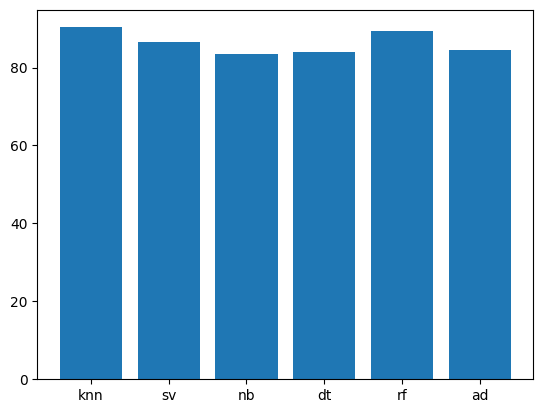

In [ ]:
x=['knn','sv','nb','dt','rf','ad']
y=acc
plt.bar(x,y)
plt.show()

In [ ]:
Y_knn=knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       122
           1       0.89      0.87      0.88        85

    accuracy                           0.90       207
   macro avg       0.90      0.90      0.90       207
weighted avg       0.90      0.90      0.90       207



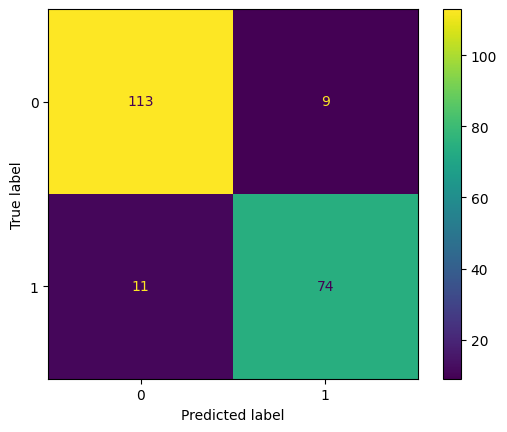

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_knn))
print(classification_report(Y_test,Y_knn))

In [ ]:
Y_new=knn.predict(scaler.transform([[1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0]]))
if(Y_new==1):
  print("Your application for credit card is Approved")
else:
  print("Your application for credit card is Rejected")


Approved


saved model with highest accuracy

In [ ]:
pickle.dump({'model': knn,'scaler':scaler},open('model&scaler.pkl', 'wb') )

hyper parameter tuning of random forest classifier

In [ ]:

rf1=RandomForestClassifier()

param_grid = {
    'n_estimators' : [5,10,20,40,80],
    'max_depth' : [None,1,2,3,4],
}
grid_search = GridSearchCV(rf1,param_grid,cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4],
                         'n_estimators': [5, 10, 20, 40, 80]})

In [ ]:
print(grid_search.best_params_)

{'max_depth': 3, 'n_estimators': 80}


In [ ]:
rf_new=RandomForestClassifier(max_depth= 3, n_estimators= 40)
rf_new.fit(X_train,Y_train)
Y_rf=rf_new.predict(X_test)

checking accuracy of RandomForestClassifier with hyper parameter tuning

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       122
           1       0.82      0.88      0.85        85

    accuracy                           0.87       207
   macro avg       0.87      0.88      0.87       207
weighted avg       0.88      0.87      0.87       207



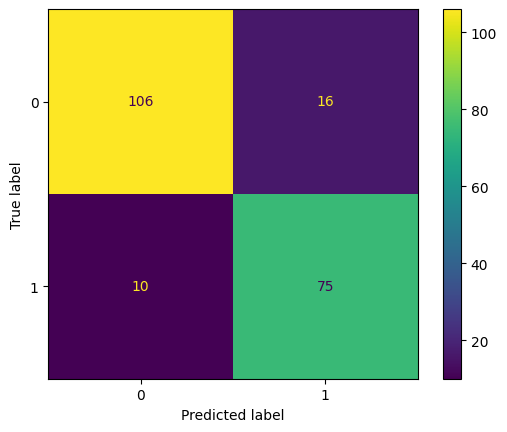

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_rf))
print(classification_report(Y_test,Y_rf))

No improvement in accuracy with hyperparameter tuning of random forest classifier

In [ ]:
pickle.dump({'model': rf,'scaler':scaler},open('model&scaler_rf.pkl', 'wb') )

Checking correlation

In [ ]:
df.corr()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
Gender,1.000000,0.035604,-0.041746,0.073291,0.069792,-0.017139,0.053600,0.086544,-0.026047,-0.077784,-0.024630,0.051674,0.085488,0.086007,-0.002063,-0.028934
Age,0.035604,1.000000,0.201316,-0.089504,-0.102450,0.011876,-0.170441,0.392787,0.204342,0.083681,0.185575,0.054778,-0.014584,-0.076281,0.018539,0.161627
Debt,-0.041746,0.201316,1.000000,-0.091526,-0.079364,0.023373,-0.047534,0.298902,0.244317,0.174846,0.271207,-0.013023,-0.122233,-0.217903,0.123121,0.206294
Married,0.073291,-0.089504,-0.091526,1.000000,0.982257,-0.049977,-0.025360,-0.080624,-0.129863,-0.162464,-0.106457,-0.004964,-0.045169,0.001858,-0.120065,-0.194306
BankCustomer,0.069792,-0.102450,-0.079364,0.982257,1.000000,-0.055812,-0.030136,-0.073064,-0.142094,-0.173199,-0.112750,0.006113,-0.021402,0.013328,-0.025170,-0.185134
EducationLevel,-0.017139,0.011876,0.023373,-0.049977,-0.055812,1.000000,-0.000607,0.037001,0.109642,0.128549,0.006978,0.074210,-0.010455,0.086612,0.004808,0.130434
Ethnicity,0.053600,-0.170441,-0.047534,-0.025360,-0.030136,-0.000607,1.000000,-0.103549,-0.036520,-0.002420,-0.036518,-0.008281,0.036243,-0.017336,-0.017261,0.000866
YearsEmployed,0.086544,0.392787,0.298902,-0.080624,-0.073064,0.037001,-0.103549,1.000000,0.345689,0.222982,0.322330,0.138139,-0.020528,-0.070495,0.051345,0.322475
PriorDefault,-0.026047,0.204342,0.244317,-0.129863,-0.142094,0.109642,-0.036520,0.345689,1.000000,0.432032,0.379532,0.091276,-0.113623,-0.055010,0.090012,0.720407
Employed,-0.077784,0.083681,0.174846,-0.162464,-0.173199,0.128549,-0.002420,0.222982,0.432032,1.000000,0.571498,0.017043,-0.242568,-0.044834,0.077652,0.458301


<Axes: >

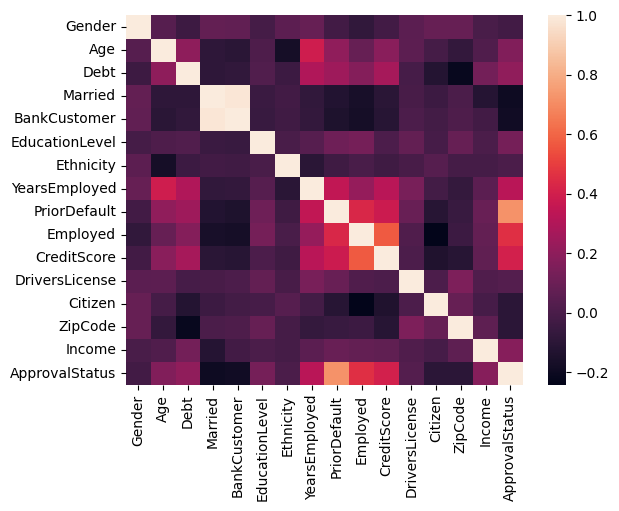

In [ ]:
sns.heatmap(df.corr())

Trail by droping columns with 0 correlation

In [ ]:
df1=df.drop(['Gender','Ethnicity','DriversLicense','ZipCode'],axis=1)
df1

,Age,Debt,Married,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,30.83,0.000,1,0,12,1.25,1,1,1,0,0,1
1,58.67,4.460,1,0,10,3.04,1,1,6,0,560,1
2,24.50,0.500,1,0,10,1.50,1,0,0,0,824,1
3,27.83,1.540,1,0,12,3.75,1,1,5,0,3,1
4,20.17,5.625,1,0,12,1.71,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,2,2,4,1.25,0,0,0,0,0,0
686,22.67,0.750,1,0,1,2.00,0,1,2,0,394,0
687,25.25,13.500,2,2,5,2.00,0,1,1,0,1,0
688,17.92,0.205,1,0,0,0.04,0,0,0,0,750,0


In [ ]:
X1=df1.iloc[:,:-1]
X1

,Age,Debt,Married,BankCustomer,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income
0,30.83,0.000,1,0,12,1.25,1,1,1,0,0
1,58.67,4.460,1,0,10,3.04,1,1,6,0,560
2,24.50,0.500,1,0,10,1.50,1,0,0,0,824
3,27.83,1.540,1,0,12,3.75,1,1,5,0,3
4,20.17,5.625,1,0,12,1.71,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,2,2,4,1.25,0,0,0,0,0
686,22.67,0.750,1,0,1,2.00,0,1,2,0,394
687,25.25,13.500,2,2,5,2.00,0,1,1,0,1
688,17.92,0.205,1,0,0,0.04,0,0,0,0,750


In [ ]:
Y1=df1.iloc[:,-1]
Y1

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: ApprovalStatus, Length: 690, dtype: int64

In [ ]:
X1_scaled=scaler.fit_transform(X1)
X1_scaled

array([[2.56842105e-01, 0.00000000e+00, 5.00000000e-01, ...,
        1.49253731e-02, 0.00000000e+00, 0.00000000e+00],
       [6.75488722e-01, 1.59285714e-01, 5.00000000e-01, ...,
        8.95522388e-02, 0.00000000e+00, 5.60000000e-03],
       [1.61654135e-01, 1.78571429e-02, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 8.24000000e-03],
       ...,
       [1.72932331e-01, 4.82142857e-01, 1.00000000e+00, ...,
        1.49253731e-02, 0.00000000e+00, 1.00000000e-05],
       [6.27067669e-02, 7.32142857e-03, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 7.50000000e-03],
       [3.19548872e-01, 1.20535714e-01, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1_scaled,Y1,test_size=0.3,random_state=1)

In [ ]:
models=[knn,sv,nb,dt,rf,ad]
for model in models:
  print("********************************",model,"**************************************")
  model.fit(X1_train,Y1_train)
  Y1_pred=model.predict(X1_test)
  print(classification_report(Y1_test,Y1_pred))

******************************** KNeighborsClassifier() **************************************
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       122
           1       0.81      0.91      0.86        85

    accuracy                           0.87       207
   macro avg       0.87      0.88      0.87       207
weighted avg       0.88      0.87      0.88       207

******************************** SVC() **************************************
              precision    recall  f1-score   support

           0       0.95      0.84      0.90       122
           1       0.81      0.94      0.87        85

    accuracy                           0.88       207
   macro avg       0.88      0.89      0.88       207
weighted avg       0.89      0.88      0.88       207

******************************** GaussianNB() **************************************
              precision    recall  f1-score   support

           0       0.83      0.89

In [ ]:
sv1=SVC()
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(sv1,param_grid,cv=5)
grid_search.fit(X1_train,Y1_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [ ]:
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
sv_new=SVC(C= 100, gamma=0.01,kernel= 'rbf')
sv_new.fit(X1_train,Y1_train)
Y_sv=sv_new.predict(X1_test)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       122
           1       0.77      0.94      0.85        85

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.88      0.86      0.86       207



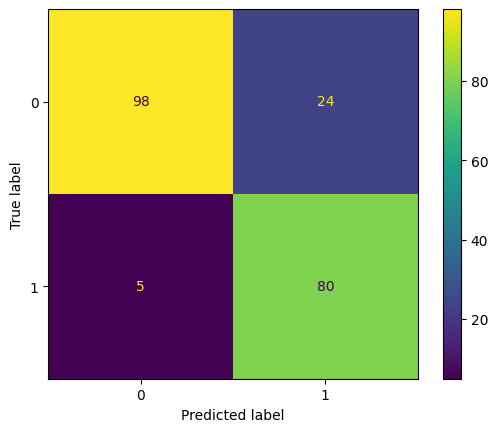

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(Y1_test,Y_sv))
print(classification_report(Y1_test,Y_sv))

Trial by Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
oversamble=SMOTE(random_state=1)
X_os,Y_os=oversamble.fit_resample(X,Y)

In [ ]:
X_os=scaler.fit_transform(X_os)
X_os

array([[1.        , 0.25684211, 0.        , ..., 0.        , 0.101     ,
        0.        ],
       [0.        , 0.67548872, 0.15928571, ..., 0.        , 0.0215    ,
        0.0056    ],
       [0.        , 0.16165414, 0.01785714, ..., 0.        , 0.14      ,
        0.00824   ],
       ...,
       [0.        , 0.20730563, 0.07107867, ..., 0.        , 0.04470569,
        0.02132   ],
       [1.        , 0.38237851, 0.08676125, ..., 0.        , 0.09575765,
        0.0469    ],
       [0.        , 0.67480852, 0.40632137, ..., 0.        , 0.00750666,
        0.01412   ]])

In [ ]:
X_os_train,X_os_test,Y_os_train,Y_os_test=train_test_split(X_os,Y_os,test_size=0.3,random_state=1)

In [ ]:
for model in models:
  print("********************************",model,"**************************************")
  model.fit(X_os_train,Y_os_train)
  Y_os_pred=model.predict(X_os_test)
  print(classification_report(Y_os_test,Y_os_pred))

******************************** KNeighborsClassifier() **************************************
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.87      0.91      0.89       120

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230

******************************** SVC() **************************************
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       110
           1       0.82      0.96      0.88       120

    accuracy                           0.87       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230

******************************** GaussianNB() **************************************
              precision    recall  f1-score   support

           0       0.75      0.93

Trail by undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersambler=RandomUnderSampler(random_state=1)
X_us,Y_us=undersambler.fit_resample(X,Y)


In [ ]:
X_us=scaler.fit_transform(X_us)
X_us

array([[0.00000000e+00, 3.99699248e-01, 2.90178571e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.80000000e-04],
       [1.00000000e+00, 6.27067669e-02, 7.32142857e-03, ...,
        0.00000000e+00, 1.40000000e-01, 7.50000000e-03],
       [0.00000000e+00, 3.16992481e-01, 4.46428571e-02, ...,
        0.00000000e+00, 8.00000000e-02, 0.00000000e+00],
       ...,
       [1.00000000e+00, 3.63909774e-02, 1.42857143e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.34135338e-01, 5.89285714e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.77894737e-01, 0.00000000e+00, ...,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
X_us_train,X_us_test,Y_us_train,Y_us_test=train_test_split(X_us,Y_us,test_size=0.3,random_state=1)

In [ ]:
for model in models:
  print("********************************",model,"**************************************")
  model.fit(X_us_train,Y_us_train)
  Y_us_pred=model.predict(X_us_test)
  print(classification_report(Y_us_test,Y_us_pred))

******************************** KNeighborsClassifier() **************************************
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        91
           1       0.89      0.83      0.86        94

    accuracy                           0.86       185
   macro avg       0.86      0.86      0.86       185
weighted avg       0.86      0.86      0.86       185

******************************** SVC() **************************************
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        91
           1       0.85      0.87      0.86        94

    accuracy                           0.86       185
   macro avg       0.86      0.86      0.86       185
weighted avg       0.86      0.86      0.86       185

******************************** GaussianNB() **************************************
              precision    recall  f1-score   support

           0       0.69      0.89

Trail by Feature extraction

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit_transform(X)
X

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750


In [ ]:
pca.explained_variance_ratio_

array([0.99888188, 0.00110989])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
for model in models:
  print("********************************",model,"**************************************")
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  print(classification_report(Y_test,Y_pred))

******************************** KNeighborsClassifier() **************************************
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       122
           1       0.62      0.61      0.62        85

    accuracy                           0.69       207
   macro avg       0.68      0.67      0.68       207
weighted avg       0.69      0.69      0.69       207

******************************** SVC() **************************************
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       122
           1       0.78      0.33      0.46        85

    accuracy                           0.69       207
   macro avg       0.72      0.63      0.62       207
weighted avg       0.71      0.69      0.65       207

******************************** GaussianNB() **************************************
              precision    recall  f1-score   support

           0       0.82      0.89

After all the trials finalized with model KNN with accuracy 90 percent,saved the model using pickle and predicted a new value using that model